<a href="https://colab.research.google.com/github/devo-id/ML/blob/main/resnet101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
print(data_dir)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/roses/2258973326_03c0145f15_n.jpg


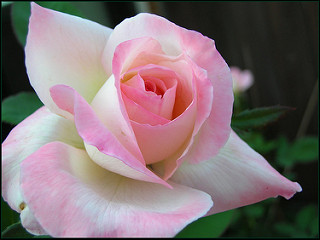

In [4]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


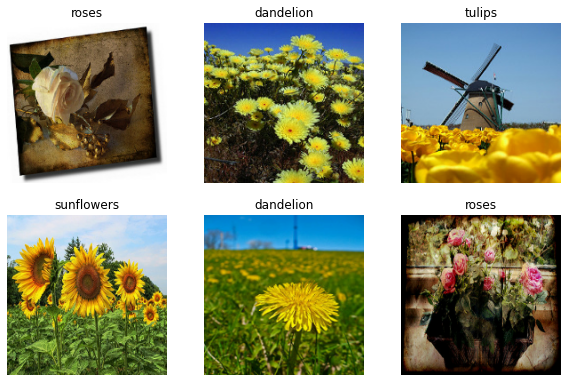

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet101(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

171446536/171446536 [==============================] - 1s 0us/step


In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 43,709,829
Trainable params: 1,051,653
Non-trainable params: 42,658,176
____________________________________

In [11]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 34s 188ms/step - loss: 0.6573 - accuracy: 0.7960 - val_loss: 0.3592 - val_accuracy: 0.8569
Epoch 2/10
92/92 [==============================] - 15s 159ms/step - loss: 0.2364 - accuracy: 0.9159 - val_loss: 0.4153 - val_accuracy: 0.8501
Epoch 3/10
92/92 [==============================] - 15s 161ms/step - loss: 0.1517 - accuracy: 0.9435 - val_loss: 0.3714 - val_accuracy: 0.8733
Epoch 4/10
92/92 [==============================] - 15s 162ms/step - loss: 0.0727 - accuracy: 0.9785 - val_loss: 0.3596 - val_accuracy: 0.8924
Epoch 5/10
92/92 [==============================] - 16s 166ms/step - loss: 0.0379 - accuracy: 0.9905 - val_loss: 0.4032 - val_accuracy: 0.8815
Epoch 6/10
92/92 [==============================] - 16s 167ms/step - loss: 0.0203 - accuracy: 0.9966 - val_loss: 0.4234 - val_accuracy: 0.8774
Epoch 7/10
92/92 [==============================] - 16s 168ms/step - loss: 0.0092 - accuracy: 0.9997 - val_loss: 0.3863 - val_accuracy: 0.8896

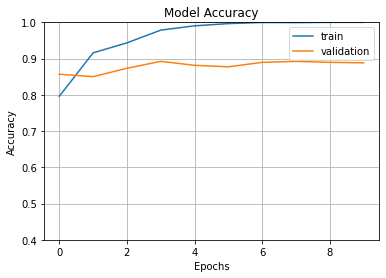

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

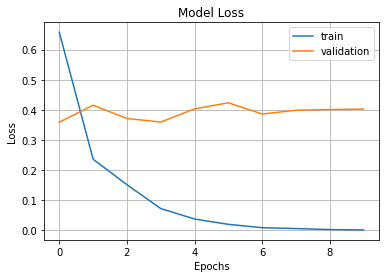

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

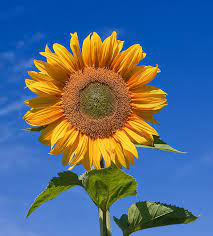

(1, 180, 180, 3)


In [32]:
import cv2
img = "/content/img (1).jpg"
image=cv2.imread(img)
display(PIL.Image.open(img))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

In [33]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[9.0427394e-04 1.7672457e-09 8.0026439e-08 9.9909568e-01 1.2937185e-10]]


In [34]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is sunflowers


SyntaxError: ignored